In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 6]


## Create synthetic data with 1 feature

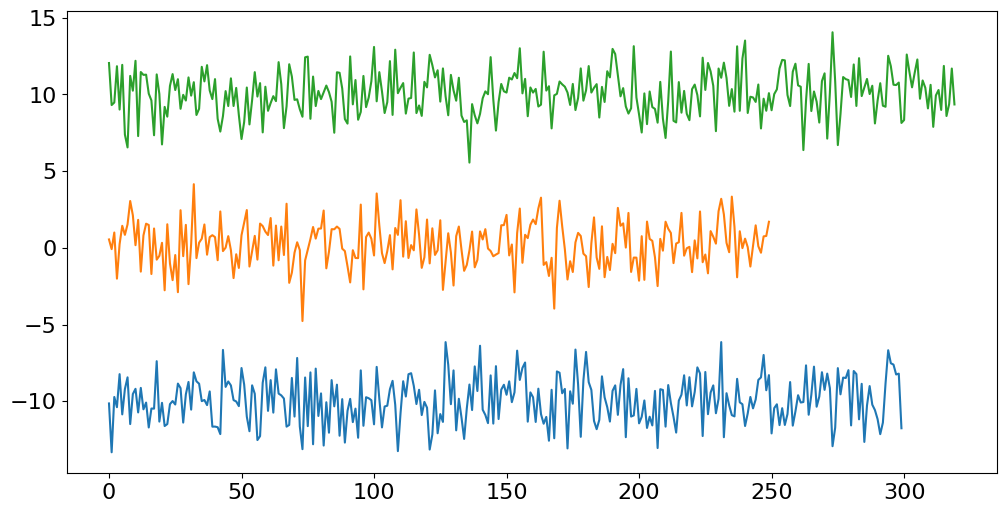

In [8]:
# You may change the sigma to see the impact.
sigma = 1.5
bassfeatures = np.random.normal(loc=-10,scale=sigma,size=300)
tunafeatures = np.random.normal(loc=0,scale=sigma,size=250)
salmonfeatures = np.random.normal(loc=10,scale=sigma,size=320)

s=plt.plot(bassfeatures)
s=plt.plot(tunafeatures)
s=plt.plot(salmonfeatures)

## Construct Xtilde and y matrices

 <font color=red> YOUR CODE BELOW </font>

In [12]:
nClasses = 3
nFeatures = 1

# Replace the ? marks 
# You can split the computation into multiple lines
# Xtilde should be a matrix of size 2x(300+250+320)
X = np.concatenate([bassfeatures, tunafeatures, salmonfeatures])[np.newaxis, :]
Xtilde = np.vstack([X, np.ones((1, X.shape[1]))])

# Y should be a matrix of size 3x(300+250+320)
y = np.zeros((nClasses, X.shape[1]))
labels = np.concatenate([
    np.zeros(bassfeatures.shape[0], dtype=int),
    np.ones(tunafeatures.shape[0], dtype=int),
    np.full(salmonfeatures.shape[0], 2, dtype=int)
])

y[labels, np.arange(X.shape[1])] = 1

## Multiclass Logistic regression with steepest descent
 <font color=red> YOUR CODE BELOW </font>

26.863967683265763
0.9822791239209497
0.8372934188514599
0.7564095820116258
0.7000167716177211
0.6566938545897433
0.621539545304898
0.5919913068009058
0.5665371341796503
0.5442083134786437


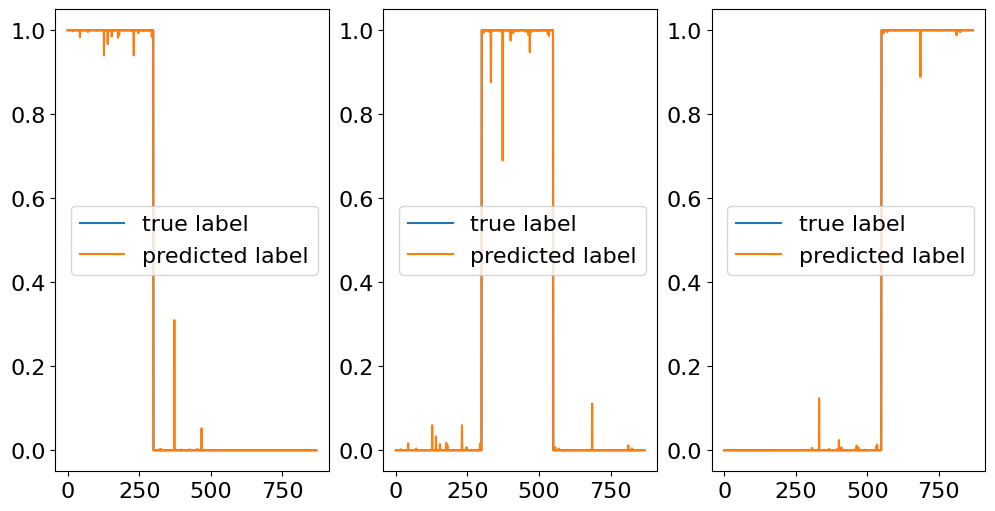

In [ ]:
A = np.random.randn(nFeatures+1,nClasses)

gamma = 1e-3
for iter in range(10000):
    # Replace the ?? marks with the correct code
    P = np.exp(np.dot(A.T, Xtilde)) / np.sum(np.exp(np.dot(A.T, Xtilde)), axis=0)
    phi = P
    error = phi - y
    gradient = np.dot(Xtilde, error.T)
    
    A = A-gamma*gradient
    if(np.mod(iter,1000)==0):
        print(np.linalg.norm(error,'fro'))

# Plotting the results        
fig,ax = plt.subplots(1,3)
for i in range(nClasses):
    ax[i].plot(y[i],label='true label')
    ax[i].plot(phi[i],label='predicted label')
    ax[i].legend()
